In [2]:
import os
import sys
import scipy as sp
import pandas as pd # dataframes
import numpy as np # algebra & calculus

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

from functools import partial # to reduce df memory consumption by applying to_numeric

import sklearn 
# import xgboost as xgb

color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings

%matplotlib inline


In [3]:
data = pd.read_csv('CBS.csv')
data.head()


,User country,No. of reviews,No. of hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,No. of rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday


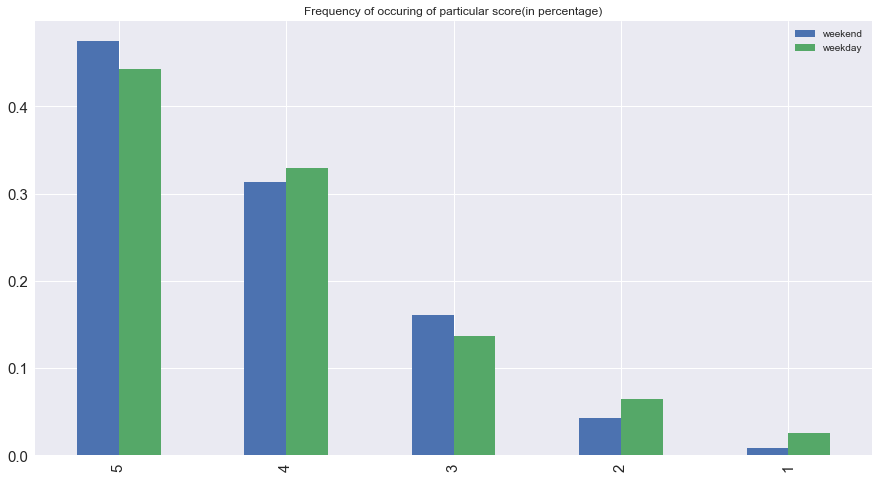

In [4]:
#######################################################################################################
####################################   EXPLORATORY ANALYSIS ################################

###  1. HOW DOES REVIEWING ON A WEEKEND MATTERS COMPARED TO REVIEWING ON WEEKDAY ######

weekend = data[(data['Review weekday'] == 'Saturday') | (data['Review weekday'] == 'Sunday')]
weekend = (weekend['Score'].value_counts())/weekend.shape[0]
weekday = data[~(data['Review weekday'] == 'Saturday') & ~(data['Review weekday'] == 'Sunday')]
weekday = (weekday['Score'].value_counts())/weekday.shape[0]

df = pd.DataFrame()
df['weekend'] = weekend
df['weekday'] = weekday
df.plot.bar(figsize=(15,8),title='Frequency of occuring of particular score(in percentage)', fontsize=15)

########### MOTIVATION WAS TO CHECK IF PEOPLE WHO REVIEW ON A WEEKEND GIVE HIGHER RATING OR NOT.
########### DIDN'T SEE SIGNIFICANT EVIDENCE TO SUPPORT OUR HYPOTHESIS. 32
#### CONCLUSION:  THUS, RATING IN GENERAL DOESN'TDEPEND ON THE DAY IT WAS GIVEN. 

    amateur   fresh    pro    rookie
5  0.441341  0.5000  0.490  0.365591
4  0.318436  0.1875  0.335  0.365591
3  0.173184  0.1250  0.110  0.161290
2  0.044693  0.1250  0.050  0.086022
1  0.022346  0.0625  0.015  0.021505


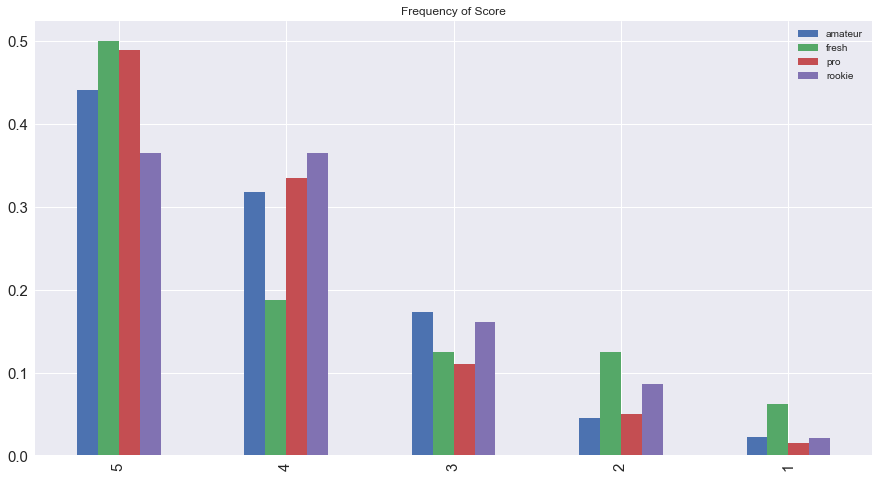

In [5]:
###  1. DOES EXPERIENCED(USERS WITH MORE MEMBER YEARS) HAS ANY ROLE TO PLAY OR NOT? ########

#### LET'S FIRST CLASSIFY THE AGE IN 4 CATEGORIES: 
#### 0 : FRESH JOIN
#### 1-2 : ROOKIE
#### 3-6 : AMATEUR
#### >7 : PRO
def user_exp(x):
    if(x==0):
        return "fresh"
    elif(x==1 or x==2):
        return "rookie"
    elif(x>2 and x<=6):
        return "amateur"
    else:
        return "pro"

df = data.copy()
df['User Exp'] = df['Member years'].apply(lambda x: user_exp(x))
fresh, rookie = df[df['User Exp'] == 'fresh'], df[df['User Exp'] == 'rookie']
amateur, pro = df[df['User Exp'] == 'amateur'], df[df['User Exp'] == 'pro']

fresh = (fresh['Score'].value_counts())/fresh.shape[0]
rookie = (rookie['Score'].value_counts())/rookie.shape[0]
amateur = (amateur['Score'].value_counts())/amateur.shape[0]
pro = (pro['Score'].value_counts())/pro.shape[0]

df = pd.DataFrame({'fresh': fresh, 'rookie': rookie, 'amateur':amateur, 'pro':pro})
print (df)
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

#################################  FRESH CASE:   ############################################
#### FOR FRESH CASE(WITH 0 MEMBER YEARS): WE CAN SEE THAT THESE MEMBERS TEND TO GIVE 5 STAR RATING THE MOST COMPARED
#### TO OTHER GROUPS, ALSO FRESH HAS THE HIGHEST PERCENTAGE FOR RATING=5 AND RATING=1. THIS SHOWS FRESH'S 
#### HAVE A TREND OF CHOSING EITHER EXTREME OF THE SPECTRUM. 


######################## PRO CASE:  #######################3
### USERS WITH MANY YEARS OF EXPERIENCE OFFERS THE LOWEST PERCENTAGE OF RATING=1 AND SECOND HIGHEST PERCENTAGE FOR
### RATING=5. 



<class 'pandas.core.groupby.DataFrameGroupBy'>
     Africa      Asia  Europe  North America   Oceania  South America
1  0.142857  0.068966    0.01       0.017241  0.029412            NaN
2  0.142857  0.068966    0.06       0.073276       NaN            NaN
3  0.142857  0.206897    0.16       0.150862  0.147059       0.166667
4  0.285714  0.379310    0.34       0.288793  0.470588       0.333333
5  0.285714  0.275862    0.43       0.469828  0.352941       0.500000


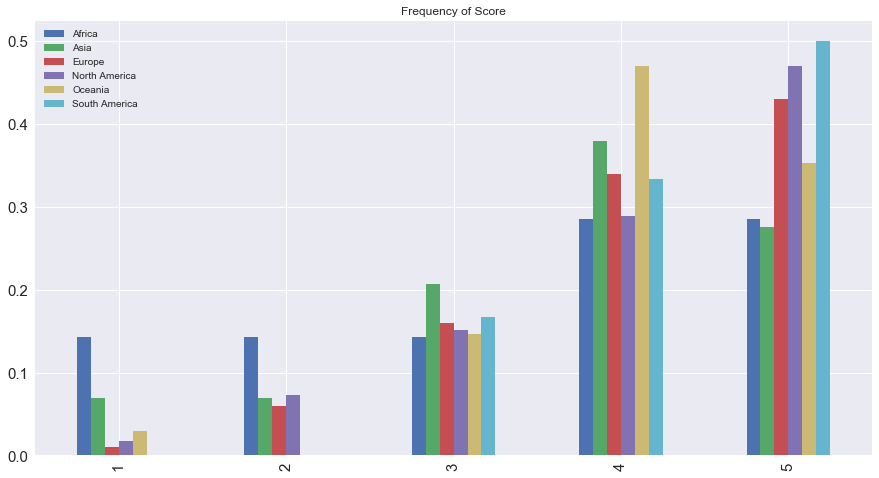

In [11]:
###  1. DOES USER CONTINENT HAS ANY ROLE TO PLAY OR NOT? ########
df = data.dropna()

groups = df.groupby('User continent')
out = {}
print(type(groups))
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
print (df)

df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

###### CONCLUSION: USER FROM eUROPE, NORTH AND SOUTH AMERICA TENDS TO GIVE HIGHER RATING(4 OR 5) IN GENERAL.
##### WHILE ASIANS ARE A LITTLE HARDER TO PLEASE. MOST OF THE DENSITY LIES IN RATING=3 OR RATING=4 REGION.

##### CANNOT SAY ANYTHING ABOUT AFRICANS AS THE NUMBER OF DATA POINTS WERE LESS IN THAT CASE.

In [31]:
groups

        big    medium     small
1  0.024306  0.020833       NaN
2  0.069444  0.041667  0.083333
3  0.145833  0.166667  0.250000
4  0.326389  0.322917  0.291667
5  0.434028  0.447917  0.375000


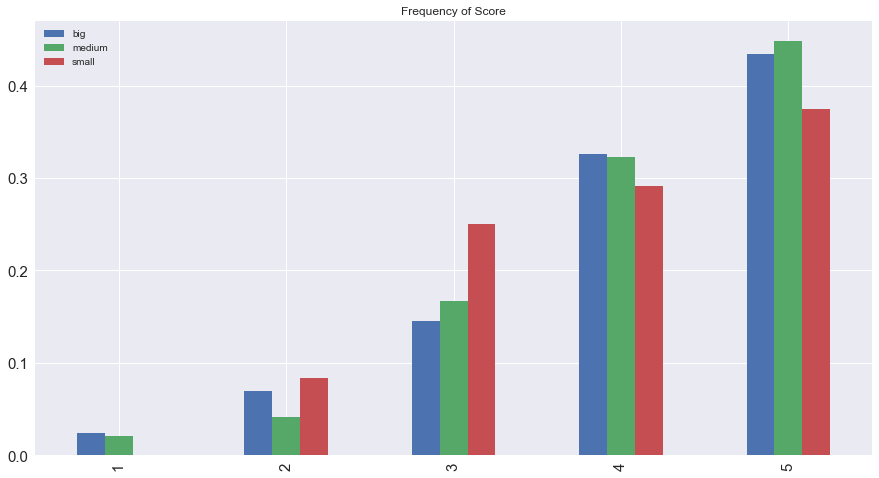

In [70]:
###  1. DOES SIZE OF HOTEL HAS ANY ROLE TO PLAY OR NOT? ########
df = data.dropna()
df['No. of rooms'].unique()

def classify_hotel(x):
    if x<=500:
        return 'small'
    elif x>500 and x<=1500:
        return 'medium'
    else:
        return 'big'
    
df['Hotel size'] = df['No. of rooms'].apply(lambda x: classify_hotel(x))
groups = df.groupby('Hotel size')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
print df

df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)


#### ONLY SIGNIFICANT OBSERVATION CAN BE THAT SMALL HOTELS DO NOT GENERALLY ATTRACT VERY LOW RATINGS.

          3         4         5
1  0.017857  0.020833  0.026042
2  0.059524  0.083333  0.041667
3  0.196429  0.187500  0.062500
4  0.333333  0.402778  0.260417
5  0.392857  0.305556  0.609375


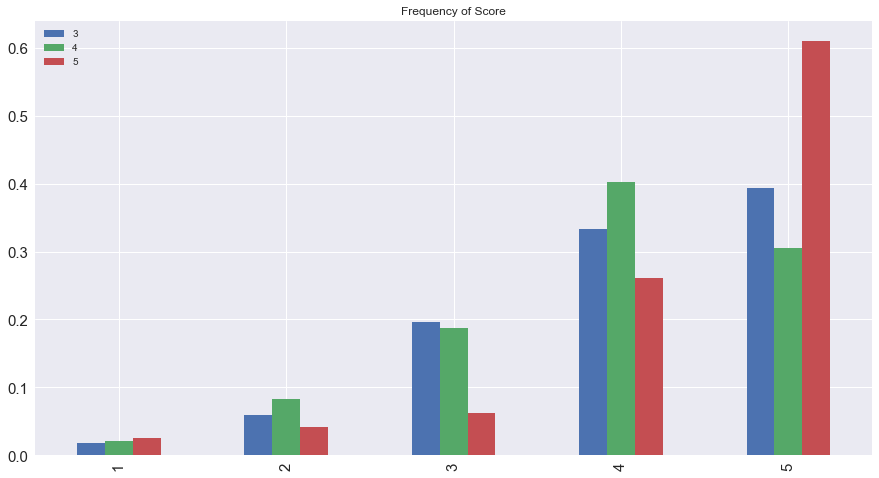

In [71]:
###  1. DOES TYPE OF HOTEL HAS ANY ROLE TO PLAY OR NOT? ########
df = data.copy()

groups = df.groupby('Hotel stars')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
print df

df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)


##### CLEAR EVIDENCE THAT 5-STAR HOTELS RARELY GET LOW RATINGS. THE PERCENTAGE OF RATINGS=5 IS MORE THAN 50%
##### THAT INDICATES, USERS TEND TO RATE 5 STAR HOTELS WITH RATING=5

   No internet  Internet
1     0.041667  0.020833
2     0.208333  0.052083
3     0.250000  0.137500
4     0.416667  0.320833
5     0.083333  0.468750


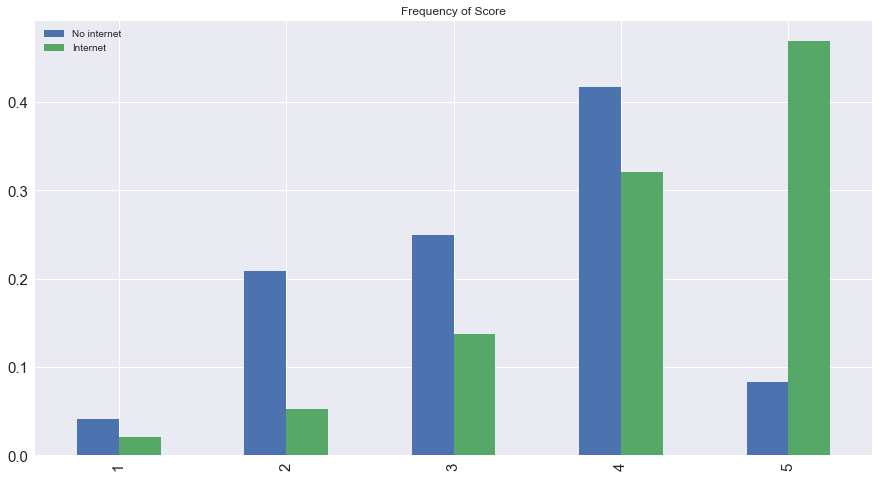

In [75]:
###  1. DOES AMENITIES AT HOTEL MATTER OR NOT? ########

### a) Free Internet

df = data.copy()

groups = df.groupby('Free internet')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No internet', 'Internet']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)



######### CLEAR EVIDENCE THAT USERS DO LIKE HAVING FREE INTERNET. IN CASE, YOU WANT TO OPEN A HOTEL
######### DO PROVIDE FREE INTERNET IF YOU WANT TO ATTRACT 5 RATING. 

   No Casino    Casino
1        NaN  0.024123
2   0.041667  0.061404
3   0.187500  0.138158
4   0.333333  0.324561
5   0.437500  0.451754


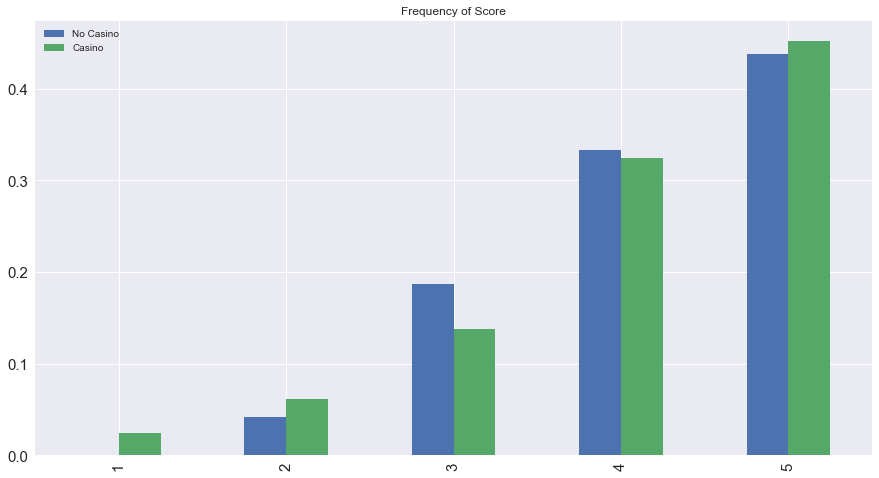

In [77]:
### a) Availability of Casino

df = data.copy()

groups = df.groupby('Casino')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No Casino', 'Casino']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

######## WE CAN SAY THAT PRESENCE OF CASINO DOESN'T REALLY AFFECT THE REVIEWS RECEIVED BY THE HOTEL 

     No spa       spa
5  0.408333  0.463542
4  0.333333  0.322917
3  0.166667  0.135417
2  0.066667  0.057292
1  0.025000  0.020833


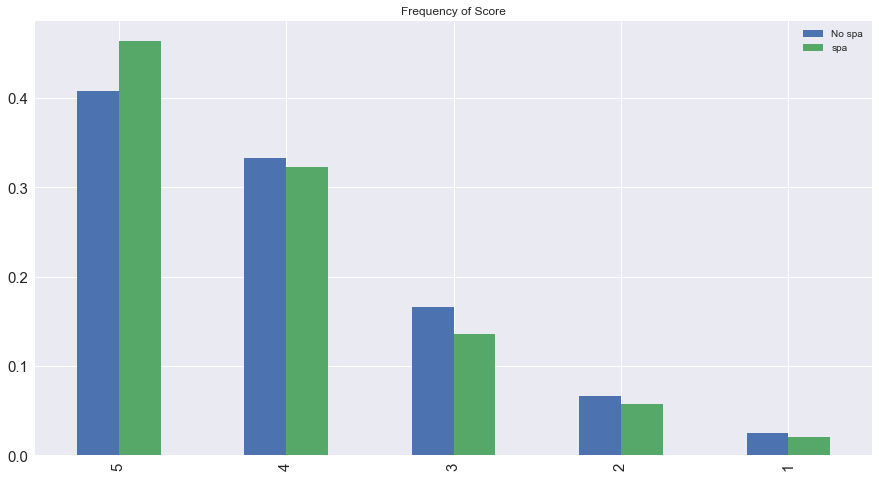

In [78]:
### a) Availability of Spa

df = data.copy()

groups = df.groupby('Spa')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No spa', 'spa']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)


########## NOT A VERY CLEAR INDICATOR OF HIGHER RATING 

     No gym       gym
5  0.500000  0.447917
4  0.250000  0.329167
3  0.125000  0.143750
2  0.083333  0.058333
1  0.041667  0.020833


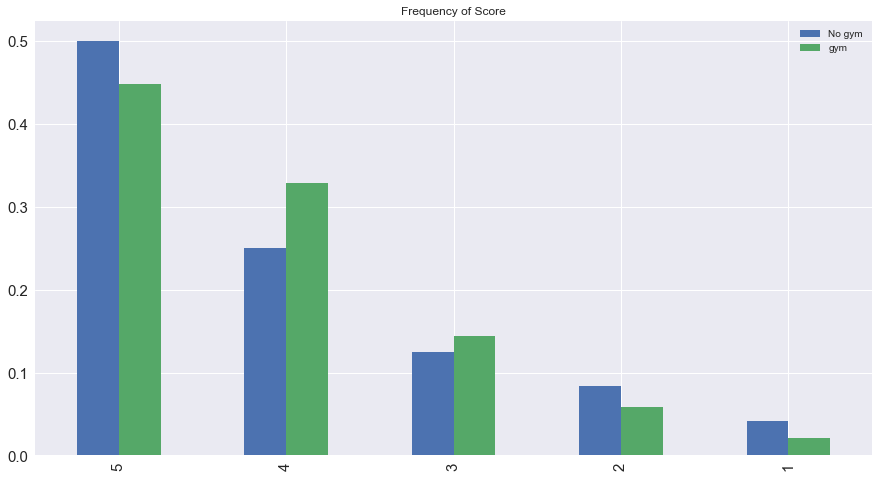

In [79]:
### a) Availability of gYM

df = data.copy()

groups = df.groupby('Gym')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No gym', 'gym']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

########## NOT A VERY CLEAR INDICATOR OF HIGHER RATING 

   No Tennis  Tennis court
5   0.442708      0.475000
4   0.322917      0.333333
3   0.138021      0.158333
2   0.070312      0.025000
1   0.026042      0.008333


Checking if Tennis court is a regular trend in 5-star hotels or not?
Group:  No tennis
5    168
3    120
4     96
Name: Hotel stars, dtype: int64
Group:  tennis
4    48
3    48
5    24
Name: Hotel stars, dtype: int64
No, it is not


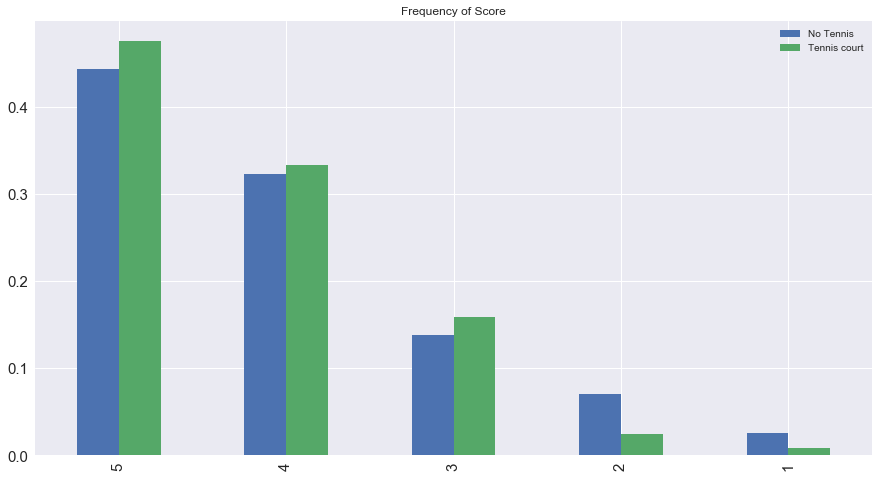

In [85]:
### a) Availability of Tennis court

df = data.copy()

groups = df.groupby('Tennis court')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No Tennis', 'Tennis court']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

############ Is there any relation between Hotel type and presence of tennis court? 

print "\n\nChecking if Tennis court is a regular trend in 5-star hotels or not?"
for name, group in groups:
    temp = group['Hotel stars']
    print "Group: ", ("No tennis" if name ==0 else "tennis")
    print temp.value_counts()
print "No, it is not"

########## ALSO, PRESENCE OF TENNIS COURT DOESN'T IS NOT GENERALLY A SIGN OF FETCHING A HIGHER RATING 

    No Pool      Pool
1  0.083333  0.018750
2  0.166667  0.054167
3  0.291667  0.135417
4  0.375000  0.322917
5  0.083333  0.468750


Checking if pool is a regular trend in 5-star hotels or not?
Group:  No pool
3    24
Name: Hotel stars, dtype: int64
Group:  pool
5    192
4    144
3    144
Name: Hotel stars, dtype: int64
No, it is not


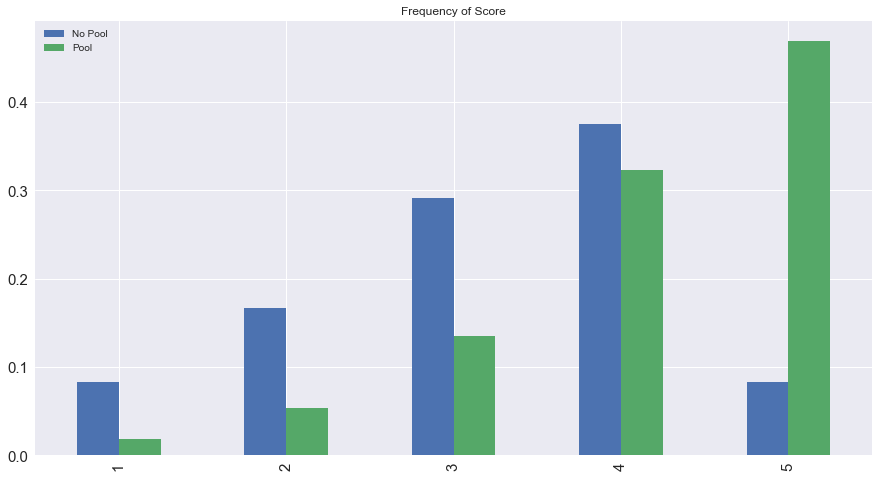

In [88]:
### a) Availability of Pool

df = data.copy()

groups = df.groupby('Pool')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
df.columns = ['No Pool', 'Pool']
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

######### CLEAR EVIDENCE THAT USERS DO LIKE HAVING POOL IN THEIR HOTELS. 
######### HAVING POOL IN A HOTEL INCREASES YOUR CHANCES OF GETTING A 5 RATING.


############ Is there any relation between Hotel type and presence of POOL? 

print "\n\nChecking if pool is a regular trend in 5-star hotels or not?"
for name, group in groups:
    temp = group['Hotel stars']
    print "Group: ", ("No pool" if name ==0 else "pool")
    print temp.value_counts()
print "Yes, it is."
######### AS 5 STAR HOTELS FETCH MORE NUMBER OF 5 RATING, WE CAN SAY THAT POOL DOES HAVE AN IMPORTANT ROLE TO PLAY


   Business   Couples  Families   Friends      Solo
1  0.040541  0.018692  0.018182  0.012195  0.041667
2  0.067568  0.056075  0.081818  0.024390  0.083333
3  0.175676  0.107477  0.200000  0.134146  0.125000
4  0.405405  0.308411  0.263636  0.353659  0.416667
5  0.310811  0.509346  0.436364  0.475610  0.333333


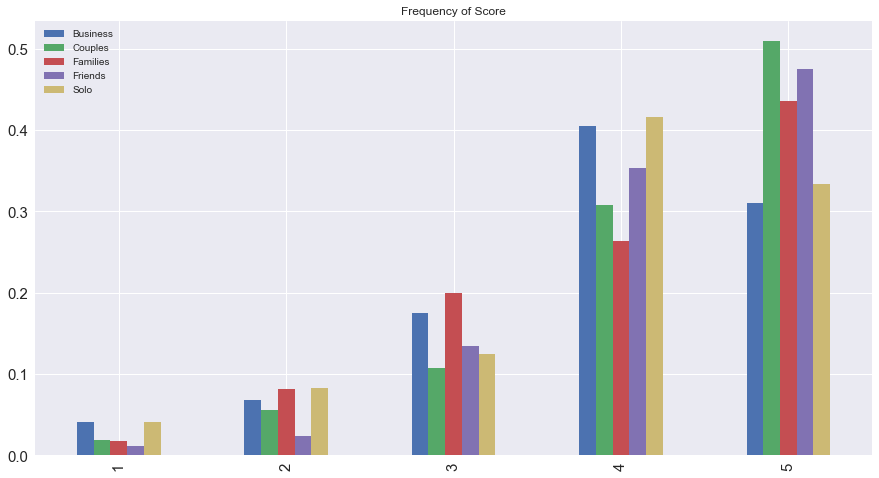

In [89]:
###  1. DOES A PARTICULAR TRAVELER TYPE GIVES HIGHER RATING? ########

df = data.copy()

groups = df.groupby('Traveler type')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

##### EVIDENCE THAT COUPLES MOSTLY TEND TO GIVE HIGHER RATING(4 OR 5)(MOST OF THE DENSITY IN THESE 2).
##### FRIENDS ALSO IN GENERALY REFRAIN FROM GIVING HIGHER RATING
##### WE CAN SAY THAT A BIAS OF COMPANY(COUPLE AND FRIENDS) THAT MAY HAVE MADE THEIR STAY MORE FUN AND THAT'S WHY WE SEE
##### HIGHER RATINGS FROM THESE 2 GROUPS

##### ALSO, PEOPLE TRAVELING FOR BUSINESS PURPOSES OR SOLO ARE HARD TO PLEASE, AS MOST OF THE DENSITY LIES FOR RATING=4. 
##### AND, THESE 2 GROUPS HAVE THE HIGHES PERCENTAGE FOR RATING=1

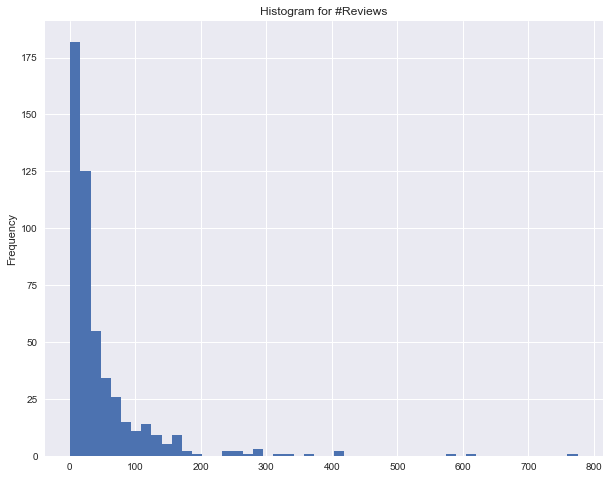

Histogram: To define groups for reviewing experience
    amateur     fresh       pro    rookie
1  0.013699  0.072917       NaN  0.011029
2  0.041096  0.125000  0.047619  0.044118
3  0.150685  0.104167  0.158730  0.150735
4  0.410959  0.197917  0.412698  0.327206
5  0.383562  0.500000  0.380952  0.466912


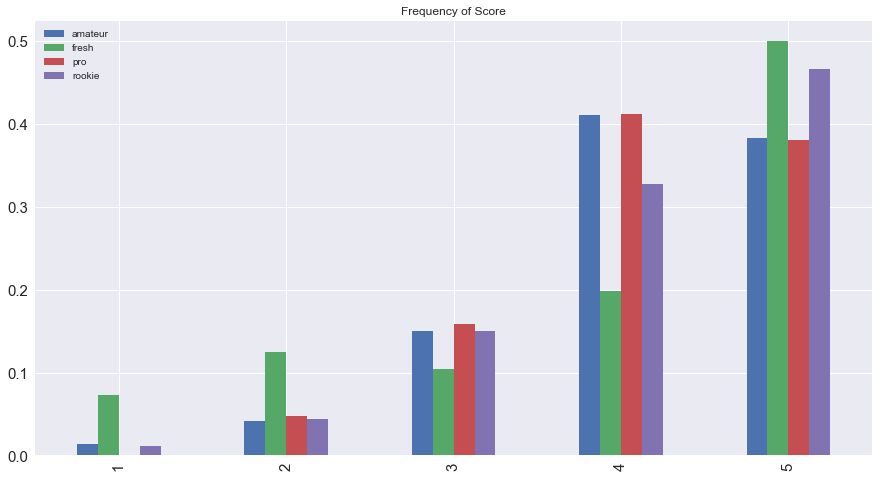

In [99]:
###  1. ARE REVIEWING EXPERIENCED(USERS WITH MORE SUBMITTED REVIEWS) ARE GOOD CRITICS? ########
df = data.copy()
ax = df['No. of reviews'].plot.hist(bins = 50, title='Histogram for #Reviews', figsize=(10,8))
plt.show()
print "Histogram: To define groups for reviewing experience"


#### LET'S FIRST CLASSIFY THE AGE IN 4 CATEGORIES: ACCORDING TO THE HISTOGRAM
#### 0-10 : FRESH JOIN
#### 10-50 : ROOKIE
#### 50-100 : AMATEUR
#### >100 : PRO

def user_exp(x):
    if(x>=0 and x<10):
        return "fresh"
    elif(x>=10 and x<50):
        return "rookie"
    elif(x>=50 and x<100):
        return "amateur"
    else:
        return "pro"
    
df['reviewing exp'] = df['No. of reviews'].apply(lambda x: user_exp(x))

groups = df.groupby('reviewing exp')
out = {}
for name, group in groups:
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)
print df
df.plot.bar(figsize=(15,8),title='Frequency of Score', fontsize=15)

##### FROM THE BAR GRAPH, A CLEAR EVIDENCE THAT MOST OF THE FRESH USERS(GIVEN ONLY 0-10 REVIEWS) HAVE A HIGH PROBABILITY
##### OF GIVING A RATING=5 THAN ANY OTHER RATING(1,2,3,4)

#### ALSO, AS THE REVIEWING EXPERIENCE INCREASES, PEOPLE BECOME MORE CRITIC-LIKE AND TO ATTRACT A 5-RATING IS DIFFICULT
#### THAN OBTAINING A 4-RATING.

In [105]:
### a) DOES USERS FROM A PARTICULAR COUNTRY GIVES HIGHER RATING? 

df = data.copy()

groups = df.groupby('User country')
out = {}
###### ONLY CONSIDER THOSE COUNTRIES WHICH HAVE ATLEAST 10 DATA POINTS
for name, group in groups:
    if(group.shape[0] <10):
        continue
    temp = group['Score'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)

print df

#### THIS ACTUALLY SUPPORTS OUR PREVIOUS HYPOTHESIS THAT AMERICAS+EUROPE(TEND TO GIVE HIGHER RATING) WHICH YOU CAN 
#### CONFIRM FROM CANADA AND USA'S VALUES.

#### OCEANIC(AUSTRALIA) AND ASIANS(INDIA) ARE NOT SO GRACIOUS WHEN GIVING RATING AS WELL.

   Australia    Canada     India   Ireland        UK       USA
1        NaN  0.030769       NaN       NaN  0.013889  0.018433
2        NaN  0.061538  0.090909       NaN  0.027778  0.073733
3   0.111111  0.169231  0.090909  0.076923  0.152778  0.115207
4   0.527778  0.246154  0.454545  0.461538  0.347222  0.317972
5   0.361111  0.492308  0.363636  0.461538  0.458333  0.474654


In [150]:
#######################   WHOLE DATA VISUALIZATION ###########################

### KEEPING SCORE AS CLASS={1,2,3,4,5}, WE WISH TO SEE HOW THE DATA POINTS OF A PARTICULAR INSTANCE ARE DISTRIBUTED IN 
### THE HYPERSPACE. 
### WE'LL EMPLOY PCA TO REDUCE THE DIMENSION FROM D->2 TO HAVE A BETTER UNDERSTANDING OF VISUALIZATION. 

### FIRST LET US SELECT SOME IMPORTANT FEATURES, FROM OUR ABOVE ANALYSIS:
#### FEATURES = {REVIEWING EXP, TRAVELER TYPE, POOL, FREE INTERNET, HOTEL STARS, USER CONTINENT}
#### CLASSES = {SCORE}

df = data.fillna(np.nan)


### PROBLEM 1: HANDLE MISSING USER CONTINENTS. 
temp = data[['User country', 'User continent']].dropna()
temp = temp.drop_duplicates()
temp = dict(zip(temp['User country'], temp['User continent']))
# print temp


def fill_missing_user_continent(row):
    if(pd.isnull(row['User continent'])):
        try:
#             print temp[row['User country']]
            return temp[row['User country']]
        except:
            return np.nan
    else:
        return row['User continent']
        

df['User continent'] = df.apply(lambda row: fill_missing_user_continent(row), axis=1)


### CREATE FEATURE REVIEWING EXP
def user_exp(x):
    if(x>=0 and x<10):
        return "fresh"
    elif(x>=10 and x<50):
        return "rookie"
    elif(x>=50 and x<100):
        return "amateur"
    else:
        return "pro"
    
df['reviewing exp'] = df['No. of reviews'].apply(lambda x: user_exp(x))


#########  TRIM DOWN TO FINAL DATA FOR PCA ########
features = ['reviewing exp', 'Traveler type','Pool', 'Free internet','Hotel stars','User continent','Score']
train = df[features]
train.head()



,reviewing exp,Traveler type,Pool,Free internet,Hotel stars,User continent,Score
0,rookie,Friends,0,1,3,North America,5
1,pro,Business,0,1,3,North America,3
2,rookie,Families,0,1,3,North America,5
3,rookie,Friends,0,1,3,Europe,4
4,fresh,Solo,0,1,3,North America,4


In [151]:
# DO ONE-HOT ENCODING ON REVIEWING EXP, TRAVELER TYPE AND USER CONTINENT 

### one-hot reviewing exp #####
one_hot = pd.get_dummies(train['reviewing exp'])
train = train.drop('reviewing exp', axis=1)
train = train.join(one_hot)

### one-hot traveler type #####
one_hot = pd.get_dummies(train['Traveler type'])
train = train.drop('Traveler type', axis=1)
train = train.join(one_hot)


#### one-hot user continent ####
one_hot = pd.get_dummies(train['User continent'])
train = train.drop('User continent', axis=1)
train = train.join(one_hot)


train.head()

,Pool,Free internet,Hotel stars,Score,amateur,fresh,pro,rookie,Business,Couples,Families,Friends,Solo,Africa,Asia,Europe,North America,Oceania,South America
0,0,1,3,5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,1,3,3,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,3,5,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,1,3,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,1,3,4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


         f1        f2  label
0 -0.347539  0.007254      5
1 -0.361866 -0.183282      3
2 -0.360392  0.006577      5
3 -0.294810  0.347330      4
4 -0.351618 -0.179672      4


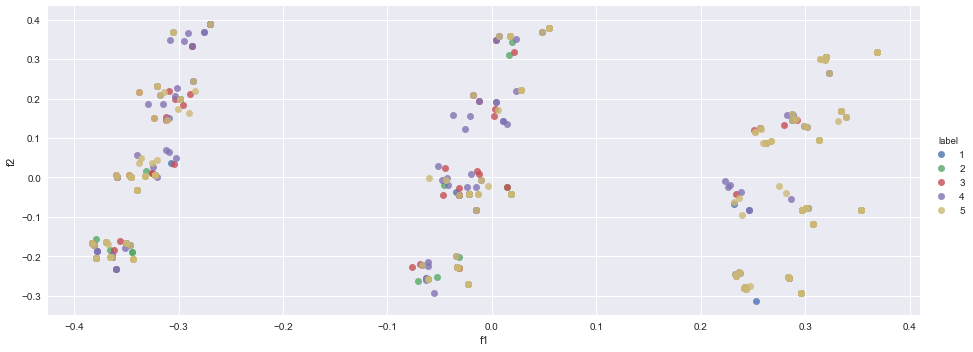

In [235]:
from sklearn.decomposition import PCA, KernelPCA


X = train.drop('Score',axis=1)
y = train['Score']

kpca = KernelPCA(n_components=2, kernel="rbf",gamma=0.08, remove_zero_eig=True)
pca = PCA(n_components=2)

X_whole = kpca.fit_transform(X)

f1 = X_whole[:,0]
f2 = X_whole[:, 1]

whole_pca_data = list(zip(f1,f2, y))
whole_pca = pd.DataFrame(whole_pca_data, columns=['f1','f2','label'])
    
print whole_pca.head()

sns.lmplot(x="f1", y="f2", hue="label", data=whole_pca, fit_reg=False, aspect=2.6)


############## IMPORTANT OBSERVATION: EVEN THOUGH, WE BROUGHT DOWN THE DIMENSION FROM N->2, WE CAN STILL SEE THAT THE 
####### CLASS = 5(RATING) IS CLEARLY SEPARABLE IN A PARTICULAR REGION IN THE HYPERSPACE. THIS GIVES US AN INTUITION 
#### THAT CAN BE A DEFINITE DECISION BOUNDARY BETWEEN THE CLASSES. 

In [251]:
########### FINALLY LET'S APPLY LASSO REGRESSION, TO KNOW WHAT ARE THE REDUNDANT FEATURES AND WHICH FEATURES ARE 
########## IMPORTANT? 

features = ['No. of reviews', 'No. of hotel reviews', 'Helpful votes','Traveler type','Pool', 'Gym','Tennis court', 
               'Spa','Casino','Free internet','Hotel stars','User continent','reviewing exp', 'Score']

train = df[features]

### one-hot reviewing exp #####
one_hot = pd.get_dummies(train['reviewing exp'])
train = train.drop('reviewing exp', axis=1)
train = train.join(one_hot)

### one-hot traveler type #####
one_hot = pd.get_dummies(train['Traveler type'])
train = train.drop('Traveler type', axis=1)
train = train.join(one_hot)


#### one-hot user continent ####
one_hot = pd.get_dummies(train['User continent'])
train = train.drop('User continent', axis=1)
train = train.join(one_hot)
train.head()


,No. of reviews,No. of hotel reviews,Helpful votes,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel stars,...,Couples,Families,Friends,Solo,Africa,Asia,Europe,North America,Oceania,South America
0,11,4,13,0,1,0,0,1,1,3,...,0,0,1,0,0,0,0,1,0,0
1,119,21,75,0,1,0,0,1,1,3,...,0,0,0,0,0,0,0,1,0,0
2,36,9,25,0,1,0,0,1,1,3,...,0,1,0,0,0,0,0,1,0,0
3,14,7,14,0,1,0,0,1,1,3,...,0,0,1,0,0,0,1,0,0,0
4,5,5,2,0,1,0,0,1,1,3,...,0,0,0,1,0,0,0,1,0,0


In [257]:
############### LASSO REGRESSION ###################

from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.015)
X = train.drop('Score', axis=1)
Y = train['Score']
clf.fit(X, Y)

for i, col in enumerate(X.columns):
    print col, clf.coef_[i]


No. of reviews -0.00102032621534
No. of hotel reviews 0.00139730069318
Helpful votes 0.000847818802896
Pool 0.499545465687
Gym 0.0
Tennis court 0.0476967419856
Spa -0.036709747684
Casino -0.0
Free internet 0.526408690629
Hotel stars 0.141716953528
amateur -0.0
fresh -0.138385688106
pro 0.0
rookie 0.0
Business -0.115634241844
Couples 0.108117726672
Families -0.0
Friends 0.0883358415357
Solo -0.0
Africa -0.0
Asia -0.11720299827
Europe 0.0
North America 0.00217740915099
Oceania 0.0
South America 0.0


In [ ]:
#################### OBSERVATIONS FROM ABOVE  ##################

## 1. FEATURES HAVING beta~0 (i.e WHICH DOESN'T SEEM IMPORTANT ARE):
##  No. of reviews, No. of hotel reviews, Helpful votes, Gym, Casino, amateur_reviewing exp, pro_reviewing exp
## rookie_reviewing exp, Families_traveler type, Solo_traveler type, African, European, Oceanic and South American continent

### THE RESULTS GO WITH OUR ANALYSIS THAT 
### GYM, CASINO WERE NOT IMPORTANT FEATURES


## 2. FEATURES WITH NON-0 beta VALUES. SUPPORTS OUR INITIAL ANALYSIS
## POOL, AND FREE INTERNET ARE VERY IMPORTANT AMENITIES.
## HOTEL STARS DO PLAY AN IMPORTANT ROLE IN GETTING 5 RATING.
## COUPLES AND FRIENDS MAY HAVE A BIAS WHILE RATING AND THUS THESE ARE NOT ZEROS
## ASIANS ARE HARD TO PLEASE. 
## FRESH REVIEWING EXP(0-10 REVIEWS) GENERALL TEND TO GIVE HIGHER RATING. 

# THUS THE ABOVE MODEL IS IN ACCORDANCE WITH OUR INITIAL ANALYSIS. 
